In [4]:
from PandaSQLite import PandaSQLiteDB
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
db = PandaSQLiteDB("pi.sql", auto_commit=False)

In [3]:
# db.import_data("strong", "strong.csv")
# db.import_data("weak", "weak.csv")

In [98]:
db.execute("UPDATE strong SET alg='Critical' WHERE alg='critical'")
db.execute("UPDATE strong SET alg='Reduce' WHERE alg='reduce'")
db.execute("UPDATE weak SET alg='Reduce' WHERE alg='reduce'")
db.execute("UPDATE weak SET alg='Critical' WHERE alg='critical'")

/var/folders/7w/xd28j9bd12gf6d3mhwgtpzg00000gn/T/ipykernel_73114/3974421746.py:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(


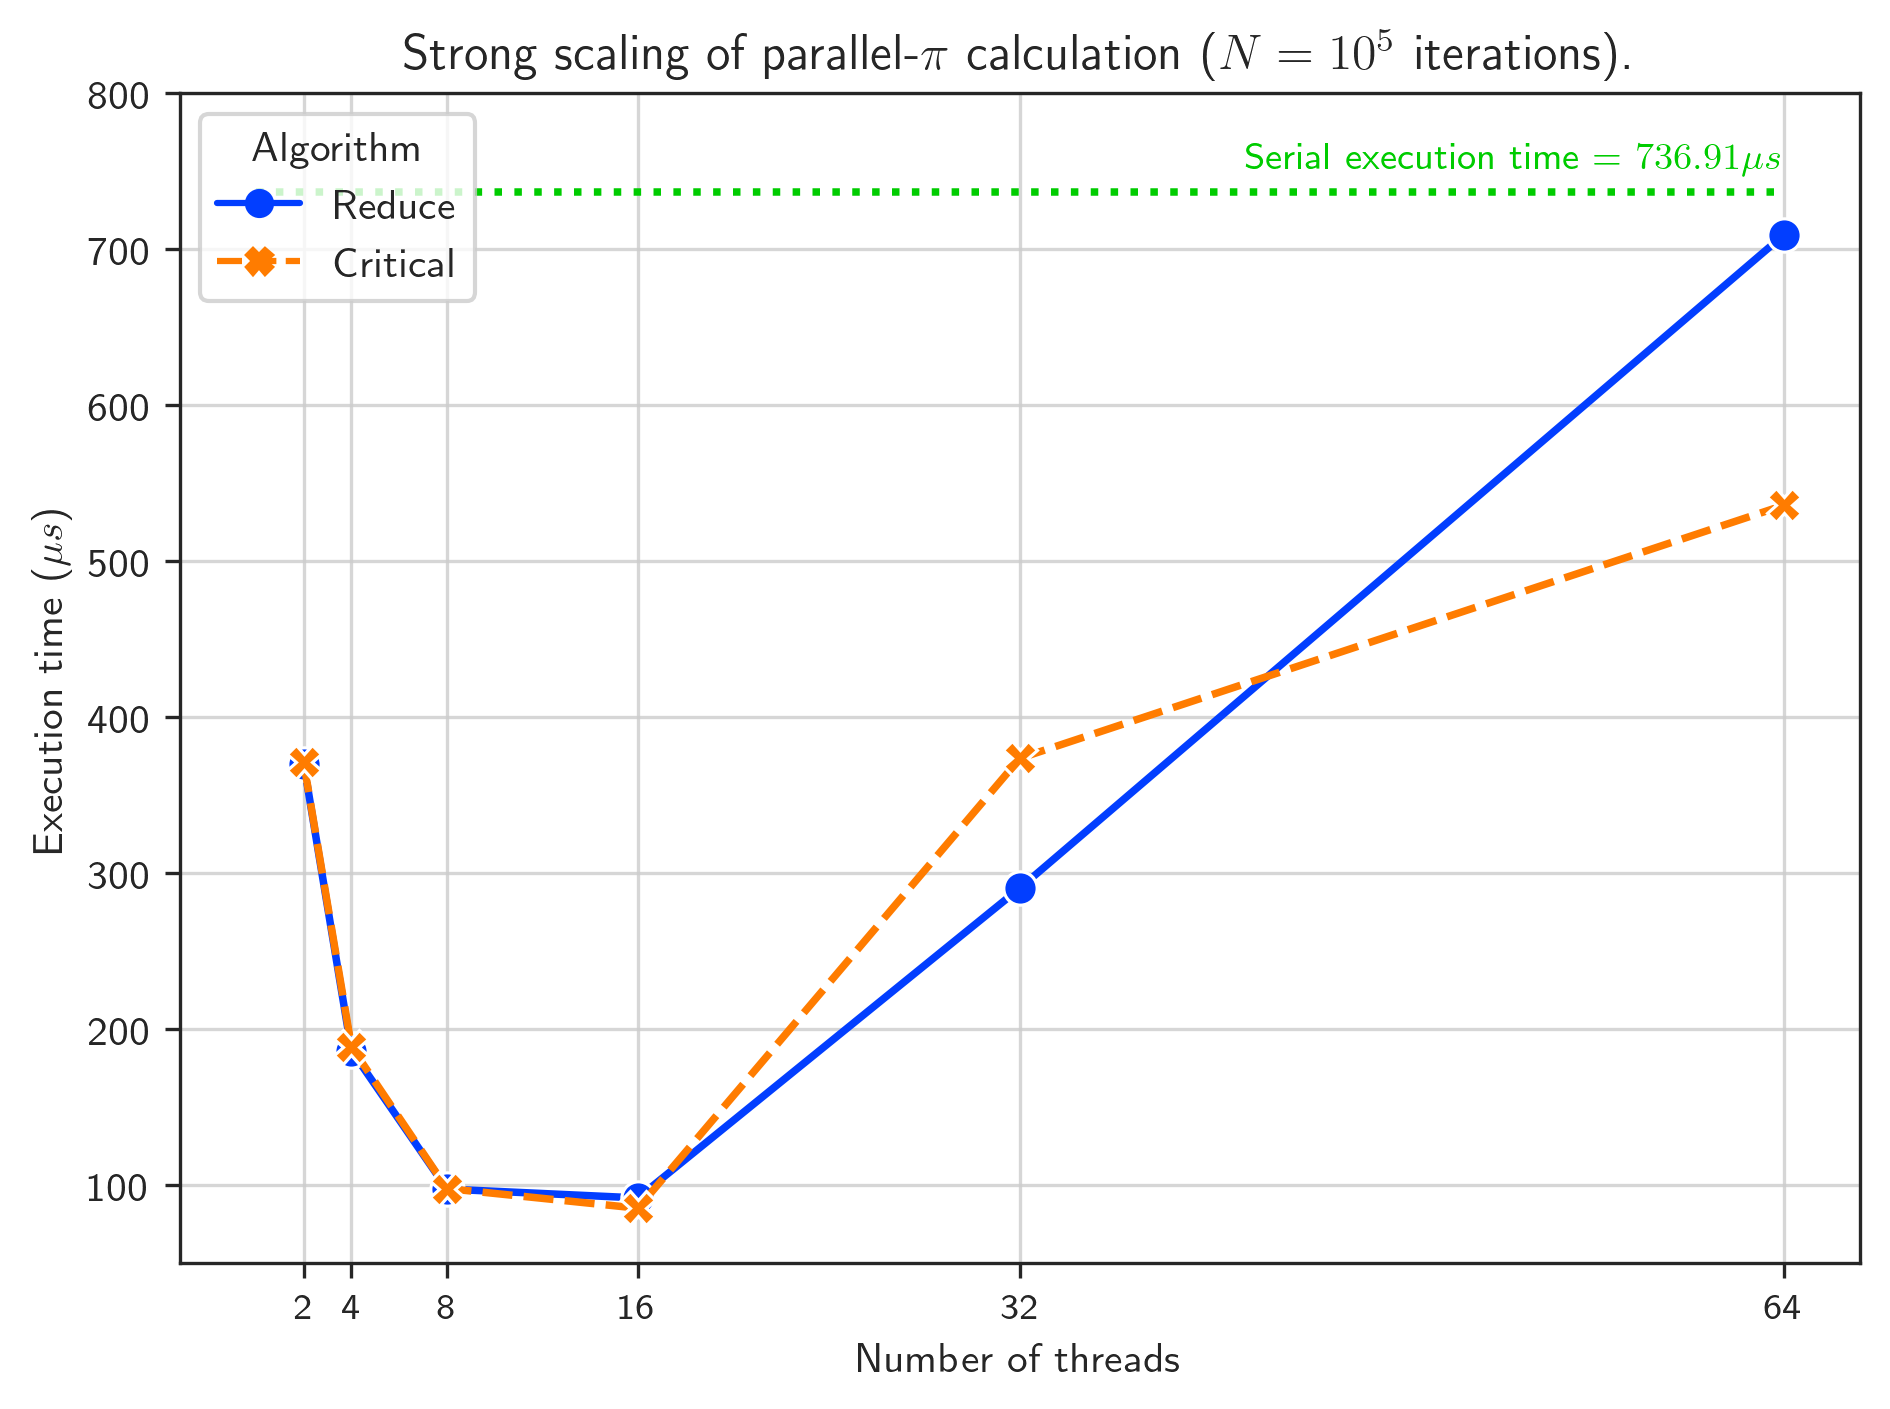

In [6]:

f, ax = plt.subplots(dpi=300)
plt.rcParams['text.usetex'] = True
sns.set_style("ticks")
pal = sns.color_palette("bright")
colors = pal.as_hex()
colors[5] = "#57b3e9"

sns.lineplot(
    data=db.query(f"SELECT alg as Algorithm, time as Time, n_threads as Threads FROM strong WHERE alg <> 'serial'"),
    x="Threads",
    y="Time",
    linewidth=1.8,
    hue="Algorithm",
    style="Algorithm",
    markers=True,
    markersize=8,
    palette=colors,
    errorbar=None,
    ax=ax
).set_title("Strong scaling of parallel-$\pi$ calculation ($N=10^5$ iterations).")


sns.move_legend(ax, "upper left")
#plt.rcParams["font.serif"] = "Times New Roman"
ax.set(ylabel=r'Execution time ($\mu s$)', xlabel=r'Number of threads')
plt.xticks([2**i for i in range(1,7)], [f"{2**i}" for i in range(1,7)])
plt.yticks([100*i for i in range(1,9)], [f"{100*i}" for i in range(1,9)])
plt.tick_params(axis='x', which='major', labelsize=9)
plt.ylim([50, 800])
plt.grid(alpha=0.8)
plt.tight_layout()
tserial = db.query(f"SELECT time from strong WHERE alg = 'serial'").values[0]
ax.hlines(tserial, 0, 64, color="#00CC00", linestyles="dotted", linewidth=1.8)
ax.text(64, tserial+10, f"Serial execution time = ${tserial[0]} \mu s$", ha="right", va="bottom", color="#00CC00", fontsize=9)
plt.savefig(f"par_pi_strong_scaling.svg", format="svg")


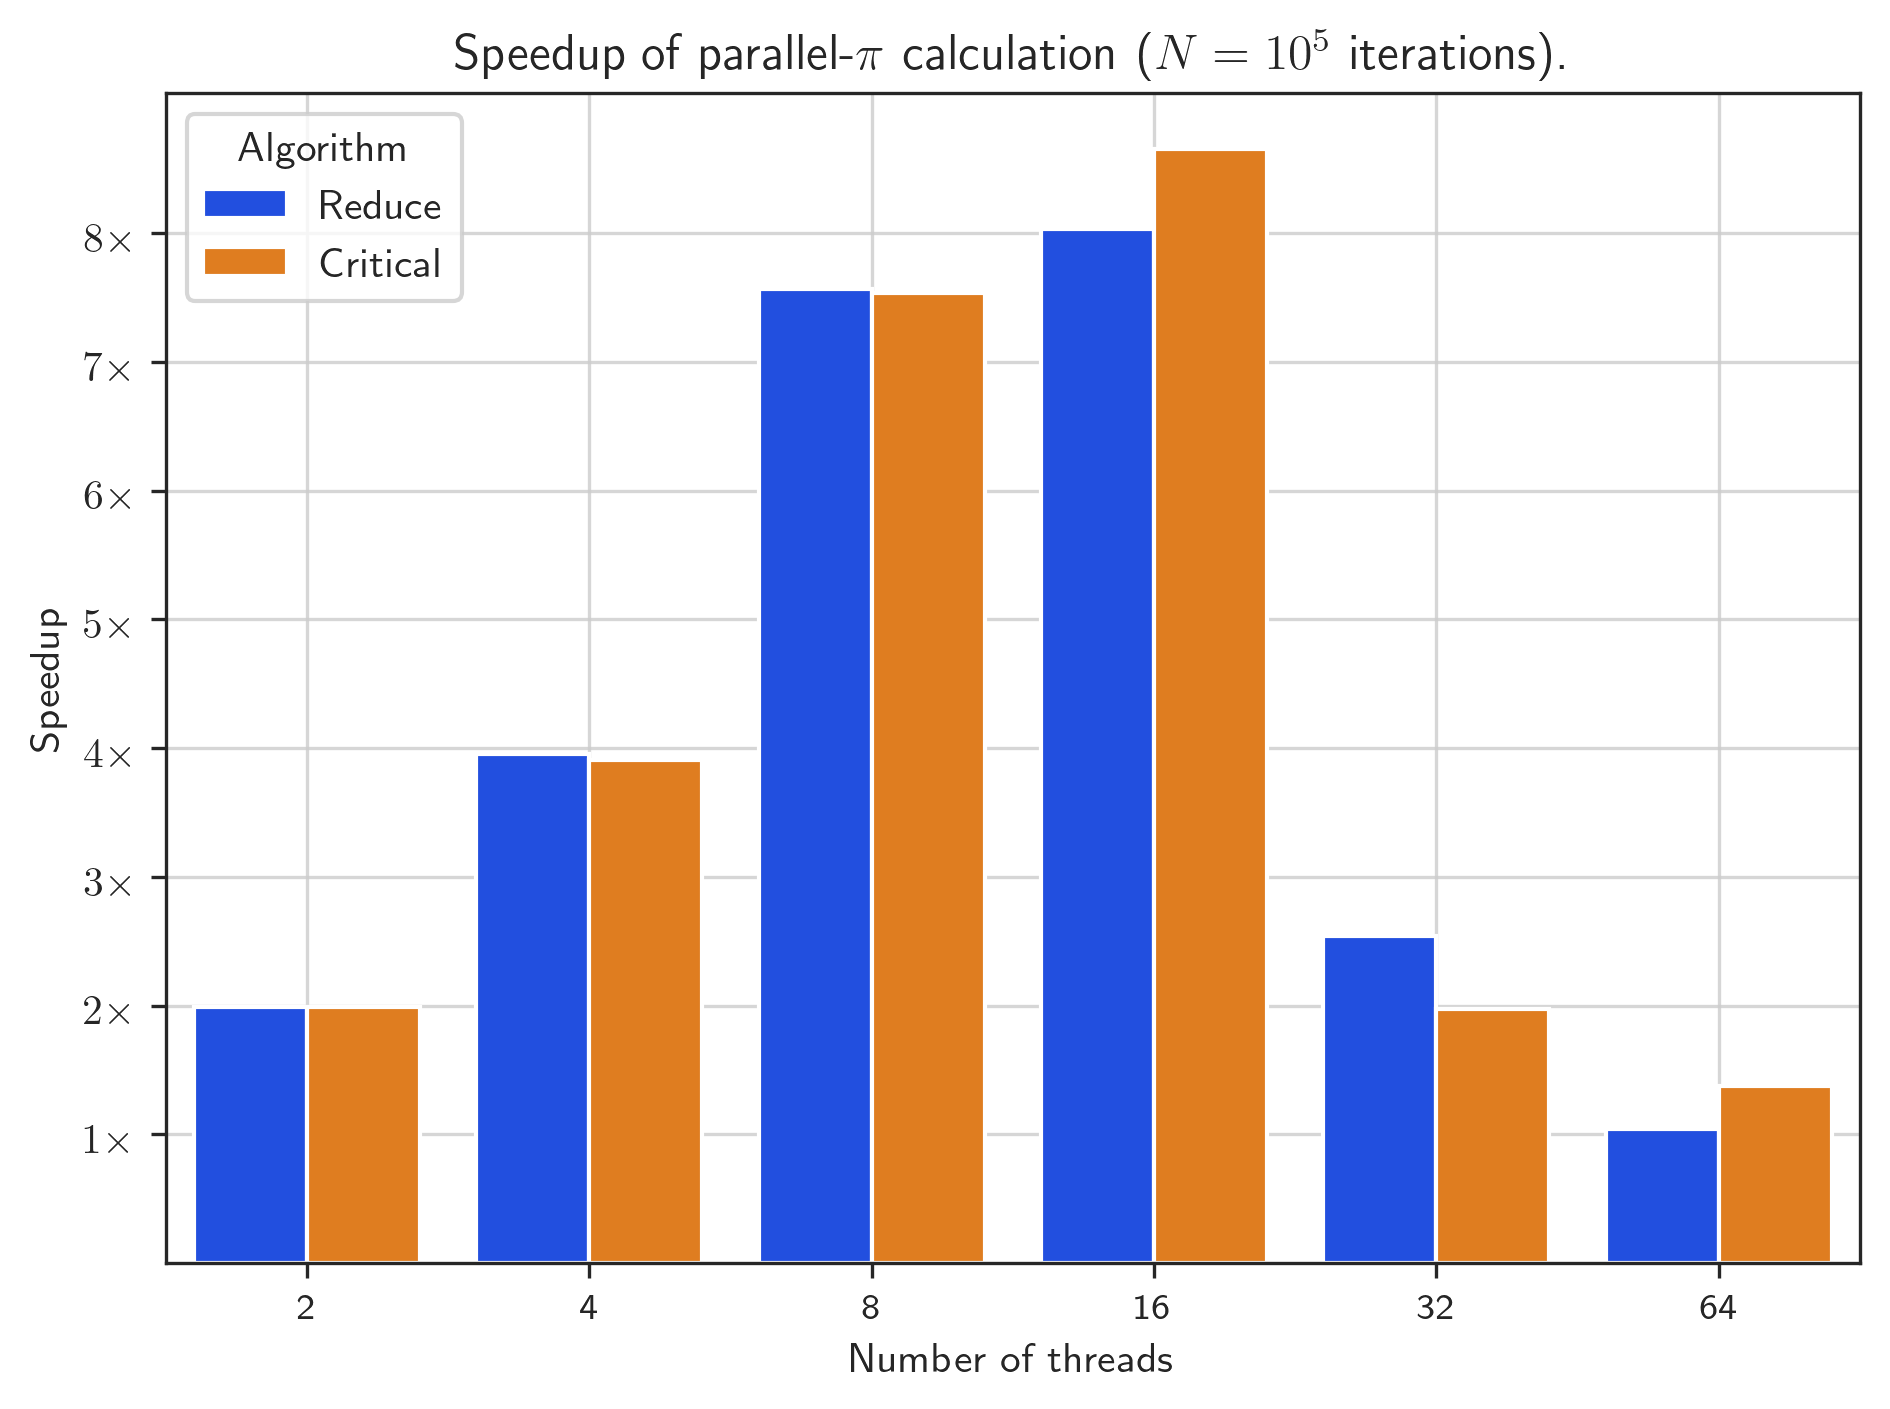

In [7]:
f, ax = plt.subplots(dpi=300)
plt.rcParams['text.usetex'] = True
sns.set_style("ticks")
pal = sns.color_palette("bright")
colors = pal.as_hex()
colors[5] = "#57b3e9"

sns.barplot(
    data=db.query(f"SELECT alg as Algorithm, 736.91/time as Speedup, n_threads as Threads FROM strong WHERE alg <> 'serial'"),
    x="Threads",
    y="Speedup",
    hue="Algorithm",
    palette=colors,
    errorbar=None,
    ax=ax
).set_title("Speedup of parallel-$\pi$ calculation ($N=10^5$ iterations).")


sns.move_legend(ax, "upper left")
#plt.rcParams["font.serif"] = "Times New Roman"
ax.set(ylabel=r'Speedup', xlabel=r'Number of threads')
plt.tick_params(axis='x', which='major', labelsize=9)
plt.grid(alpha=0.8)
plt.yticks([i for i in range(1,9)], [f"${i}\\times$" for i in range(1,9)])
plt.tight_layout()
plt.savefig(f"par_pi_speedup.svg", format="svg")


/var/folders/7w/xd28j9bd12gf6d3mhwgtpzg00000gn/T/ipykernel_73114/755569008.py:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(


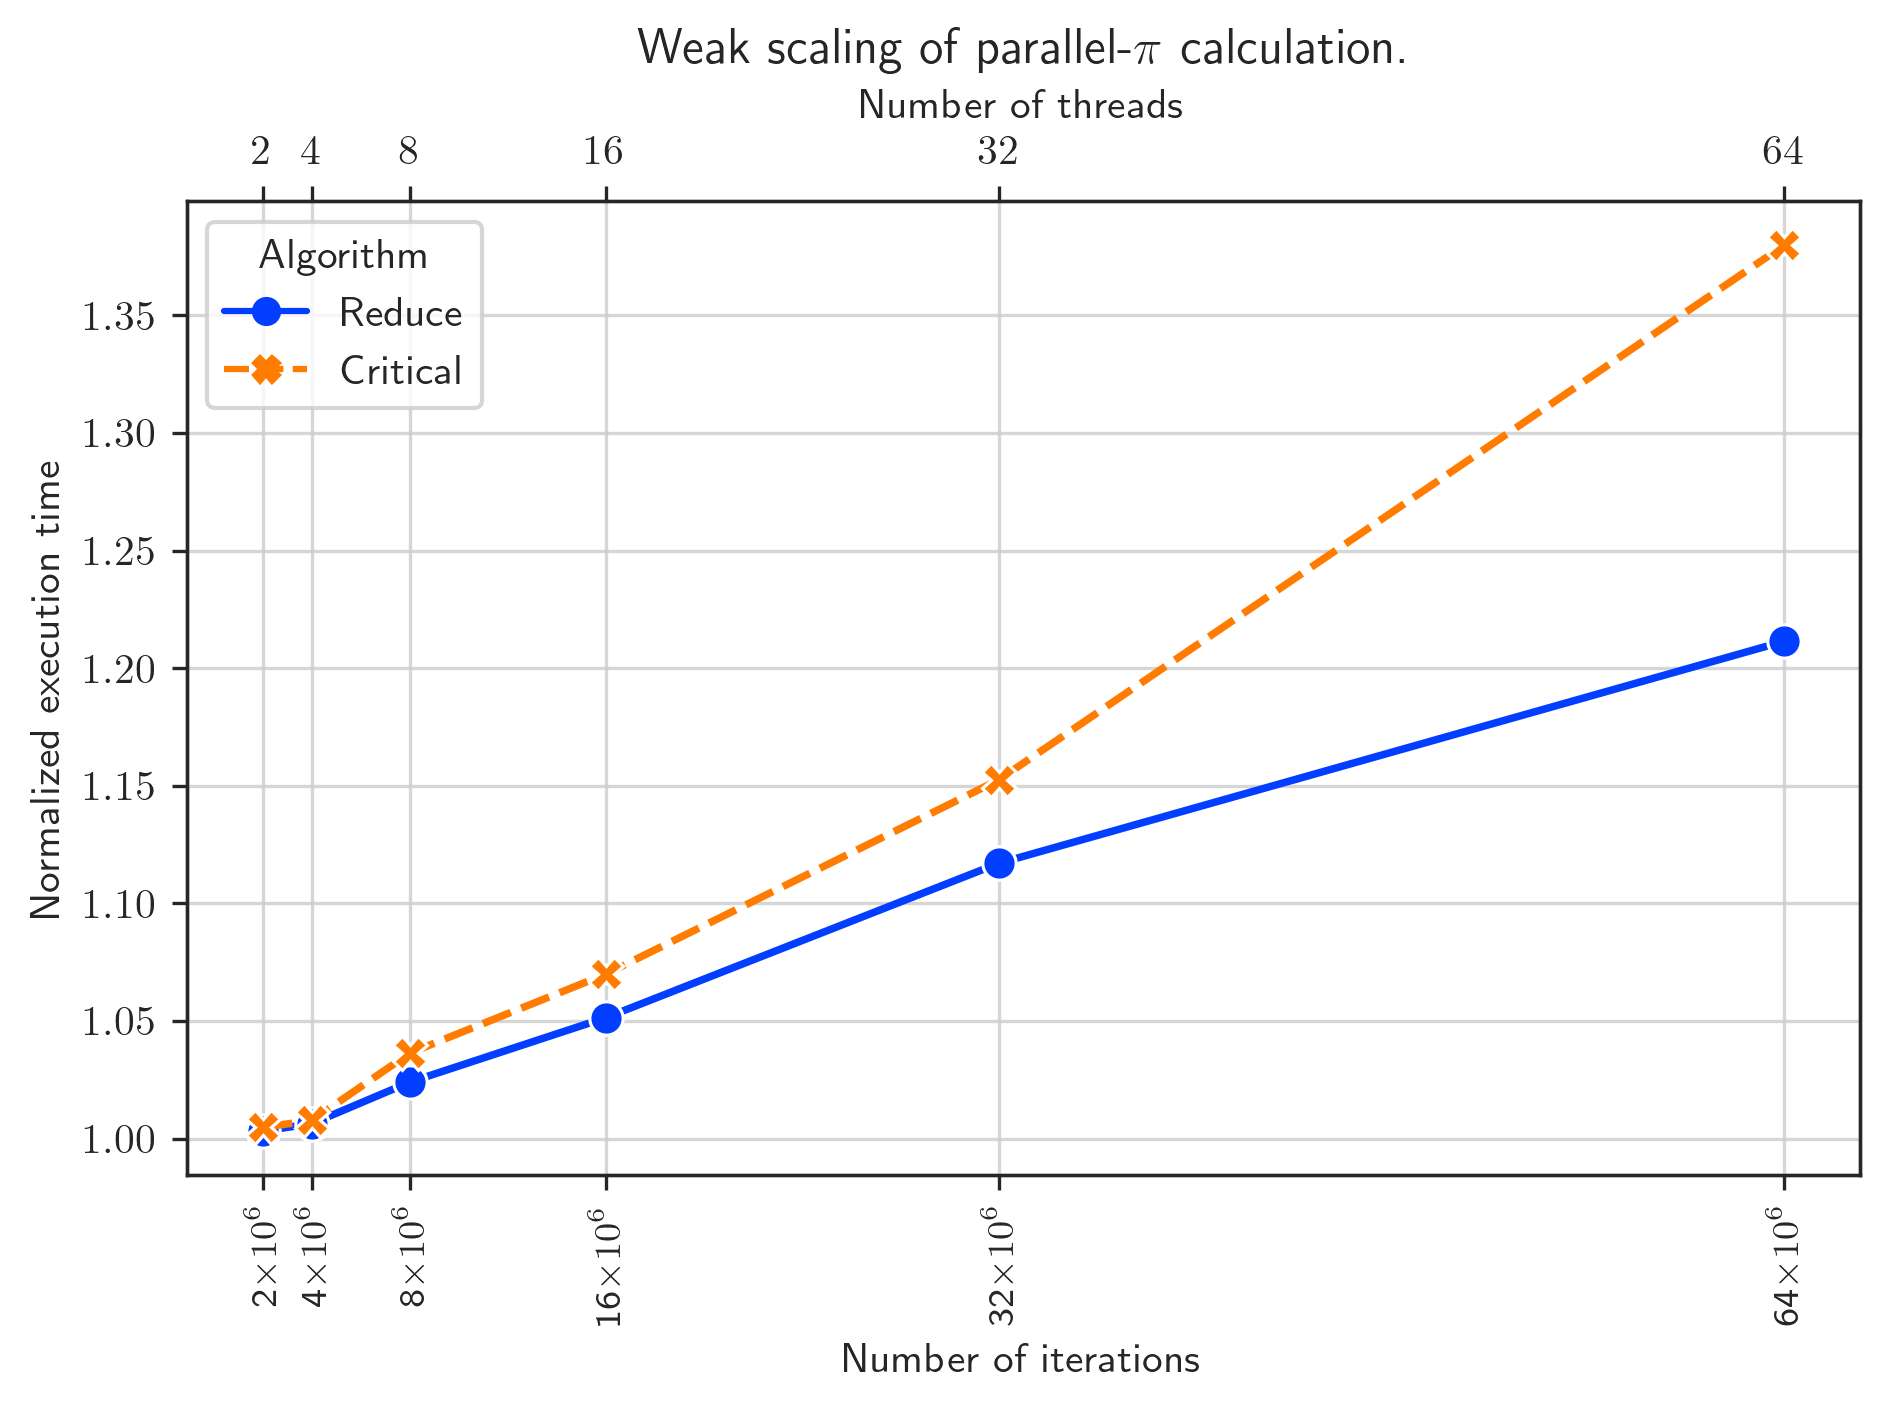

In [101]:

f, ax = plt.subplots(dpi=300)
plt.rcParams['text.usetex'] = True
sns.set_style("ticks")
pal = sns.color_palette("bright")
colors = pal.as_hex()
colors[5] = "#57b3e9"

sns.lineplot(
    data=db.query(f"SELECT alg as Algorithm, time/736.91 as Time, n_threads as Threads FROM weak WHERE alg <> 'serial'"),
    x="Threads",
    y="Time",
    linewidth=1.8,
    hue="Algorithm",
    style="Algorithm",
    markers=True,
    markersize=8,
    palette=colors,
    errorbar=None,
    ax=ax
).set_title("Weak scaling of parallel-$\pi$ calculation.")

plt.grid(alpha=0.8)
#ax.set_xscale('log', base=2)
sns.move_legend(ax, "upper left")
#plt.rcParams["font.serif"] = "Times New Roman"
ax.set(ylabel=r'Normalized execution time', xlabel=r'Number of iterations')
#plt.xticks([2**i for i in range(1,7)], [f"${2**i}$\n $N={2**i}\\times 10^6$" for i in range(1,7)])
ax.set_xticks([2**i for i in range(1,7)], [f"{2**i}$\\times 10^6$" for i in range(1,7)], rotation="vertical")
top_ax = ax.twiny()
top_ax.set_xlim(ax.get_xlim())
top_ax.set_xticks([2**i for i in range(1,7)])
top_ax.set(xlabel=r'Number of threads')

ax.tick_params(axis='x', which='major', labelsize=9)
top_ax.tick_params(axis='x', which='major', labelsize=10)
plt.tight_layout()

plt.savefig(f"par_pi_weak_scaling.svg", format="svg")


In [102]:
db.commit()